In [1]:
pip install yfinance matplotlib pandas



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# 1️⃣ Обираємо компанію (Apple - AAPL)
ticker_symbol = "AAPL"
ticker = yf.Ticker(ticker_symbol)

# 2️⃣ Отримуємо загальну інформацію про компанію
info = ticker.info

print(f"📌 Назва компанії: {info.get('longName', 'Немає даних')}")
print(f"🏢 Країна: {info.get('country', 'Немає даних')}")
print(f"📈 Галузь: {info.get('sector', 'Немає даних')}")
print(f"💵 Поточна ціна акцій: {info.get('currentPrice', 'Немає даних')} USD")
print(f"📊 Ринкова капіталізація: {info.get('marketCap', 'Немає даних')} USD")
print(f"⚡ P/E Ratio: {info.get('trailingPE', 'Немає даних')}")


📌 Назва компанії: Apple Inc.
🏢 Країна: United States
📈 Галузь: Technology
💵 Поточна ціна акцій: 236.0 USD
📊 Ринкова капіталізація: 3545215795200 USD
⚡ P/E Ratio: 37.460316



📅 Останні 5 записів історичних котирувань:
                                 Open        High         Low       Close  \
Date                                                                        
2025-01-27 00:00:00-05:00  224.020004  232.149994  223.979996  229.860001   
2025-01-28 00:00:00-05:00  230.850006  240.190002  230.809998  238.259995   
2025-01-29 00:00:00-05:00  234.119995  239.860001  234.009995  239.360001   
2025-01-30 00:00:00-05:00  238.669998  240.789993  237.210007  237.589996   
2025-01-31 00:00:00-05:00  247.190002  247.190002  233.440002  236.000000   

                              Volume  Dividends  Stock Splits  
Date                                                           
2025-01-27 00:00:00-05:00   94863400        0.0           0.0  
2025-01-28 00:00:00-05:00   75707600        0.0           0.0  
2025-01-29 00:00:00-05:00   45486100        0.0           0.0  
2025-01-30 00:00:00-05:00   55658300        0.0           0.0  
2025-01-31 00:00:00-05:00  10095

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


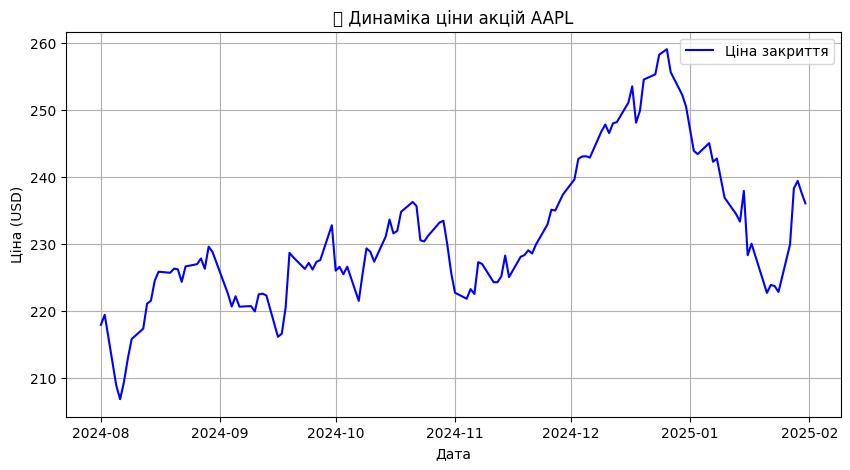


📈 Балансова звітність:
                                                      2024-09-30  \
Treasury Shares Number                                       NaN   
Ordinary Shares Number                             15116786000.0   
Share Issued                                       15116786000.0   
Net Debt                                           76686000000.0   
Total Debt                                        106629000000.0   
...                                                          ...   
Cash Cash Equivalents And Short Term Investments   65171000000.0   
Other Short Term Investments                       35228000000.0   
Cash And Cash Equivalents                          29943000000.0   
Cash Equivalents                                    2744000000.0   
Cash Financial                                     27199000000.0   

                                                      2023-09-30  \
Treasury Shares Number                                       0.0   
Ordinary Shares Number 

In [5]:
# 3️⃣ Отримання історичних даних (за останні 6 місяців)
historical_data = ticker.history(period="6mo")
print("\n📅 Останні 5 записів історичних котирувань:")
print(historical_data.tail())

# 4️⃣ Візуалізація історичних даних (ціна закриття акцій)
plt.figure(figsize=(10, 5))
plt.plot(historical_data.index, historical_data["Close"], label="Ціна закриття", color="blue")
plt.title(f"📊 Динаміка ціни акцій {ticker_symbol}")
plt.xlabel("Дата")
plt.ylabel("Ціна (USD)")
plt.legend()
plt.grid()
plt.show()

# 5️⃣ Отримання фінансової звітності
print("\n📈 Балансова звітність:")
print(ticker.balance_sheet)

print("\n📊 Звіт про доходи:")
print(ticker.financials)

print("\n💰 Звіт про грошові потоки:")
print(ticker.cashflow)

# 6️⃣ Отримання дивідендів та сплітів
print("\n💵 Дивіденди:")
print(ticker.dividends.tail())

print("\n🔄 Спліти акцій:")
print(ticker.splits.tail())

# 7️⃣ Отримання даних про опціони
options_dates = ticker.options
print("\n📅 Доступні дати для опціонів:")
print(options_dates)

if options_dates:
    option_chain = ticker.option_chain(options_dates[0])  # Отримуємо першу доступну дату
    print("\n📌 Дані по опціонах (Calls - виклики):")
    print(option_chain.calls.head())

    print("\n📌 Дані по опціонах (Puts - пут-опціони):")
    print(option_chain.puts.head())
